## <center>Support Vector Machine Assignment(Forest Fire)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Classify the Size_Categorie of the forest fire area, using SVM.</code>

In [1]:
#Importing the necessary libraries for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the csv file and having a glance at the data
Forest_data= pd.read_csv('forestfires.csv')
Forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


#### Making the necessary EDA for the model

In [3]:
#Checking the datatypes and null values if present any
Forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
#Looking into rows and columns of the data
Forest_data.shape

(517, 31)

In [5]:
#Checking the statistical report of the data
Forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Dropping few columns that does not contribute to the model
Forest_newdata = Forest_data.drop(Forest_data.columns[11:30], axis = 1  )
Forest_newdata.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


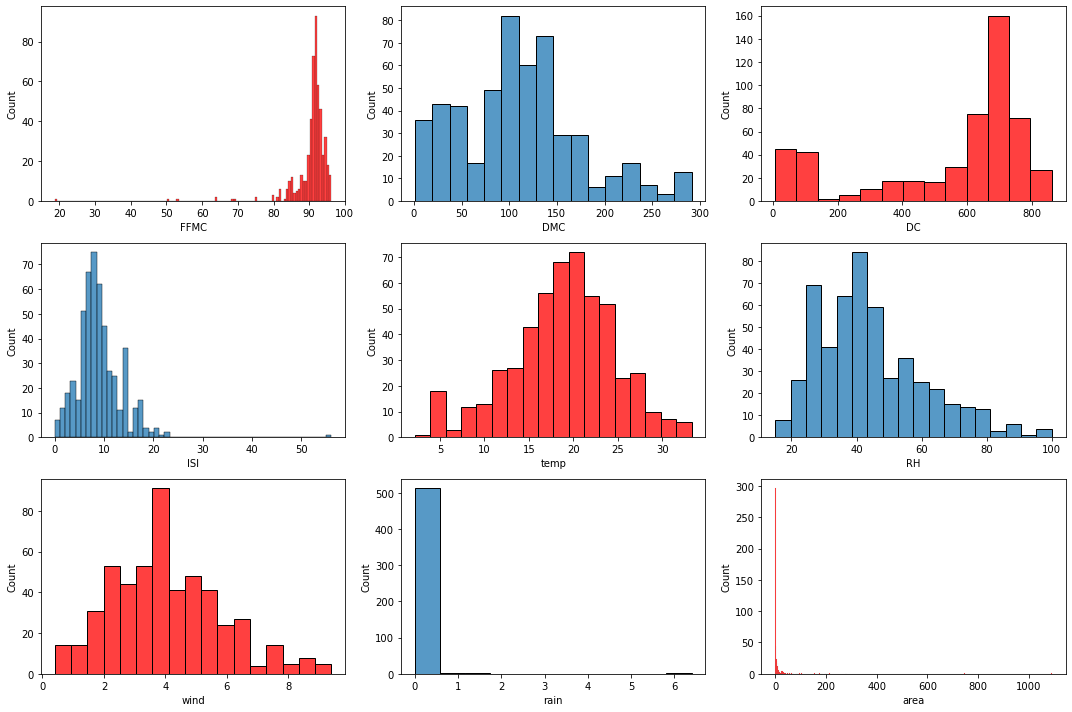

In [7]:
#Looking for outliers with the help of histplot
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.histplot(Forest_newdata.FFMC, ax=ax[0,0],color='r')
sns.histplot(Forest_newdata.DMC, ax=ax[0,1])
sns.histplot(Forest_newdata.DC, ax=ax[0,2],color='r')
sns.histplot(Forest_newdata.ISI, ax=ax[1,0])
sns.histplot(Forest_newdata.temp, ax=ax[1,1],color='r')
sns.histplot(Forest_newdata.RH, ax=ax[1,2])
sns.histplot(Forest_newdata.wind, ax=ax[2,0],color='r')
sns.histplot(Forest_newdata.rain, ax=ax[2,1])
sns.histplot(Forest_newdata.area, ax=ax[2,2],color='r')

plt.tight_layout()
plt.show()

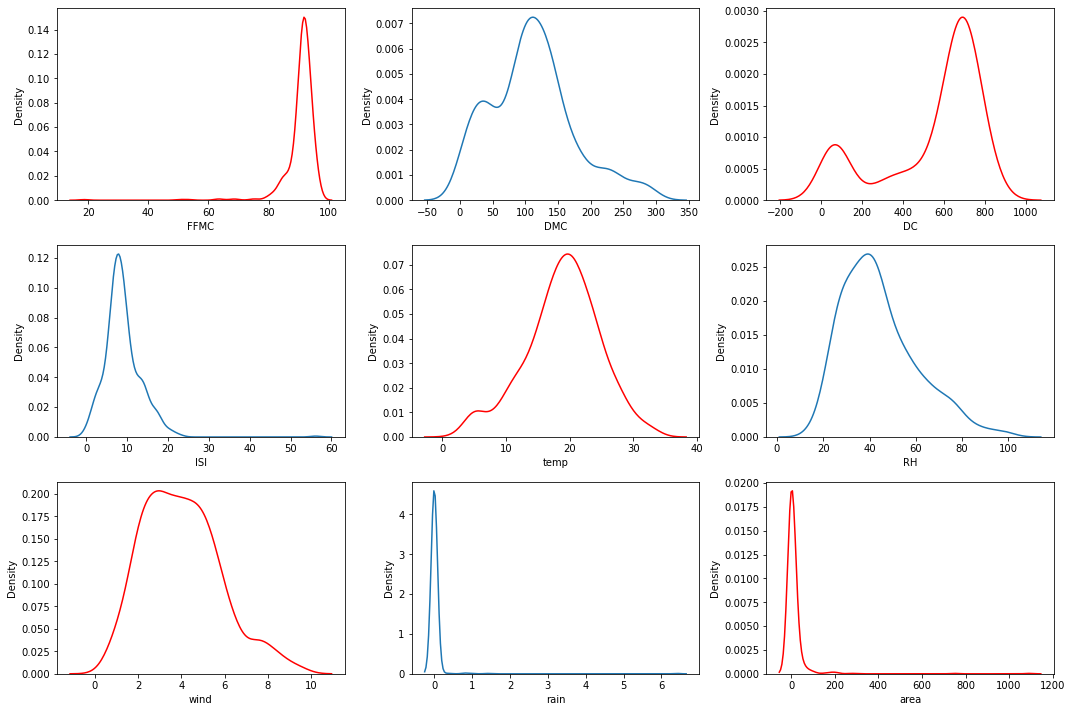

In [8]:
#checking the normal distribution of the data
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.kdeplot(Forest_newdata.FFMC, ax=ax[0,0],color='r')
sns.kdeplot(Forest_newdata.DMC, ax=ax[0,1])
sns.kdeplot(Forest_newdata.DC, ax=ax[0,2],color='r')

sns.kdeplot(Forest_newdata.ISI, ax=ax[1,0])
sns.kdeplot(Forest_newdata.temp, ax=ax[1,1],color='r')
sns.kdeplot(Forest_newdata.RH, ax=ax[1,2])

sns.kdeplot(Forest_newdata.wind, ax=ax[2,0],color='r')
sns.kdeplot(Forest_newdata.rain, ax=ax[2,1])
sns.kdeplot(Forest_newdata.area, ax=ax[2,2],color='r')

plt.tight_layout()
plt.show()

In [9]:
#Label encoding the data 
label_encoder=preprocessing.LabelEncoder()
Forest_newdata["size_category"]=label_encoder.fit_transform(Forest_newdata["size_category"])
Forest_newdata.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [10]:
#Encoding the month and day column too into numerical for further execution
Forest_newdata.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )
Forest_newdata.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [11]:
#Looking into new data 
Forest_newdata.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [12]:
#Looking the datatype of new data
Forest_newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(1), int64(3)
memory usage: 46.6 KB


In [13]:
#Checking the rows and columns of the data
Forest_newdata.shape

(517, 12)

In [14]:
#Assigning the dependent and independent values
x = Forest_newdata.iloc[:,0:11].values
y = Forest_newdata.iloc[:,-1].values

In [15]:
#Splitting the data into train and test with test data of 20%
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=30) 

### Building the SVM Models

#### RBF Kernel

In [16]:
#Building the gridsearch for better parameters to consider for building the model
model1 = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(model1,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [17]:
#looking into the best parameters and score of the model 
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.740882694541231)

In [18]:
#Building the SVM model with the above parameters 
model1 = SVC(C= 15, gamma = 0.5,kernel='rbf')
model1.fit(x_train , y_train)

y_pred = model1.predict(x_test)
acc1 = accuracy_score(y_test, y_pred) * 100

#Printing the accuracy and checking the confusion matrix
print("Accuracy =", acc1)
confusion_matrix(y_test, y_pred)

Accuracy = 73.07692307692307


array([[ 2, 28],
       [ 0, 74]], dtype=int64)

#### Poly Kernel

In [19]:
#Building the gridsearch for better parameters to consider for building the model
model2 = SVC()
param_grid2 = [{'kernel':['poly'],'gamma':[50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv2 = GridSearchCV(model2,param_grid2,cv=10)
gsv2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['poly']}])

In [20]:
#looking into the best parameters and score of the model 
gsv2.best_params_ , gsv2.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.9829849012775842)

In [21]:
#Building the SVM model with the above parameters 
model2 = SVC(C= 15, gamma = 50, kernel = "poly")
model2.fit(x_train , y_train)

y_pred = model2.predict(x_test)
acc3 = accuracy_score(y_test, y_pred) * 100

#Printing the accuracy and checking the confusion matrix
print("Accuracy =", acc3)
confusion_matrix(y_test, y_pred)

Accuracy = 95.1923076923077


array([[26,  4],
       [ 1, 73]], dtype=int64)

#### Sigmoid Kernel

In [22]:
#Building the gridsearch for better parameters to consider for building the model
model3 = SVC()
param_grid3 = [{'kernel':['sigmoid'],'gamma':[30,50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv3 = GridSearchCV(model3,param_grid3,cv=10)
gsv3.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [30, 50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['sigmoid']}])

In [23]:
#looking into the best parameters and score of the model 
gsv3.best_params_ , gsv3.best_score_

({'C': 15, 'gamma': 30, 'kernel': 'sigmoid'}, 0.7360627177700347)

In [24]:
#Building the SVM model with the above parameters 
model3 = SVC(C= 15, gamma = 30, kernel = "sigmoid")
model3.fit(x_train , y_train)

y_pred = model3.predict(x_test)
acc4 = accuracy_score(y_test, y_pred) * 100

#Printing the accuracy and checking the confusion matrix
print("Accuracy =", acc4)
confusion_matrix(y_test, y_pred)

Accuracy = 71.15384615384616


array([[ 0, 30],
       [ 0, 74]], dtype=int64)

In [25]:
#Looking into the accuracy of all the models 
Table={'model':['rbf1','poly','sigmoid'],
  'score':[acc1,acc3,acc4]
  }
Table=pd.DataFrame(Table)
Table

,model,score
0,rbf1,73.076923
1,poly,95.192308
2,sigmoid,71.153846


#### Insights Drawn:
>From the above it depicts that the Polynominal kernel gives the best accuracy compared to other kernel.Hence, Polynomial kernel can be used in the SVM model to classify the size of the forest fire area.